<a href="https://colab.research.google.com/github/jelendu/Python-Learning-Projects/blob/main/Face_emotion_Detection_FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install efficientnet_pytorch
!pip install torchsampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Installing required dependencies

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from collections import OrderedDict
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from efficientnet_pytorch import EfficientNet
from torchsampler import ImbalancedDatasetSampler
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from tqdm import tqdm
plt.ion()


In [ ]:
# Performing data augmentation for faces, we remove "ColorJitter" to avoid any bias due to lightening

data_transforms = {
    'train': transforms.Compose([
#         transforms.RandomCrop((256, 256), pad_if_needed=True),
        transforms.RandomAffine(10),
        transforms.RandomHorizontalFlip(p=0.5),
#         transforms.RandomVerticalFlip(p=0.5),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#         transforms.RandomGrayscale(p=0.5),
        transforms.RandomRotation(10),
        transforms.Resize((256,256)),
        transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
data_dir =r"C:\Users\indhu\Downloads\images\/"

In [ ]:
os.listdir(data_dir)

FileNotFoundError: ignored

In [ ]:
!pip3 install fer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.9 MB/s eta 0:00:00


In [ ]:
!pip3 install ffmpeg moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=72d401dcc00cf2c1c24ca9bd4c5c391183b2eddd2c06f9f18d88d417a3638f9b
  Stored in directory: /root/.cache/pip/wheels/1d/57/24/4eff6a03a9ea0e647568e8a5a0546cdf957e3cf005372c0245
Successfully built ffmpeg


In [ ]:
from fer import FER
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [ ]:
#### Running for one image

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir("/content/drive/MyDrive/Face emotion recognition")

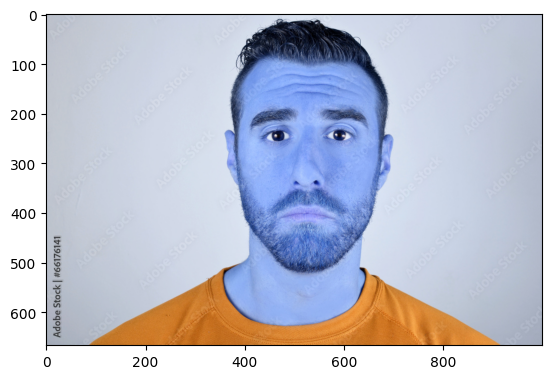

In [ ]:
test_image_one = cv2.imread("im10.jpg")
plt.imshow(test_image_one)

[{'box': [381, 90, 286, 380], 'emotions': {'angry': 0.02, 'disgust': 0.0, 'fear': 0.67, 'happy': 0.0, 'sad': 0.16, 'surprise': 0.03, 'neutral': 0.13}}]


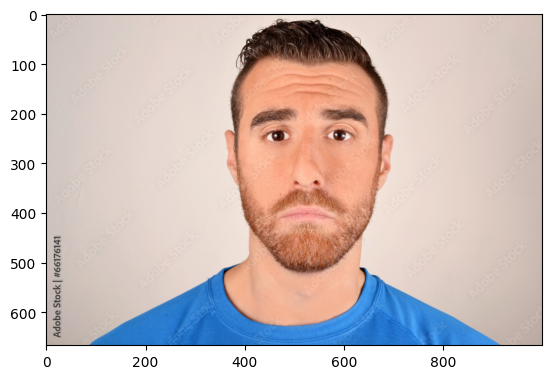

In [ ]:
test_image_one = cv2.imread("im10.jpg")
emotion_detector = FER(mtcnn=True)
# Capture all the emotions on the image
captured_emotions = emotion_detector.detect_emotions(test_image_one)
# Print all captured emotions with the image
print(captured_emotions)
plt.imshow(cv2.cvtColor(test_image_one, cv2.COLOR_BGR2RGB))

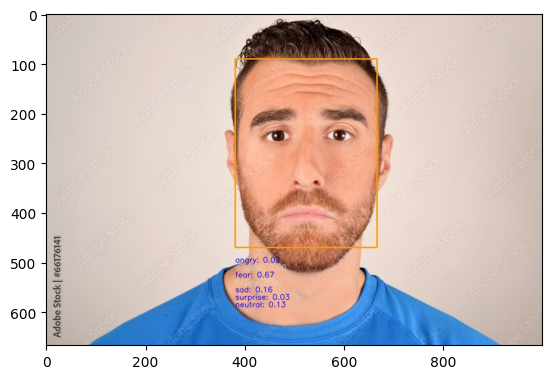

In [ ]:
result = emotion_detector.detect_emotions(test_image_one)
bounding_box = result[0]["box"]
emotions = result[0]["emotions"]
cv2.rectangle(test_image_one,(
  bounding_box[0], bounding_box[1]),(
  bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0, 155, 255), 2,)

emotion_name, score = emotion_detector.top_emotion(test_image_one )
for index, (emotion_name, score) in enumerate(emotions.items()):
    color = (211, 211,211) if score < 0.01 else (255, 0, 0)
    emotion_score = "{}: {}".format(emotion_name, "{:.2f}".format(score))

    cv2.putText(test_image_one,emotion_score,
               (bounding_box[0], bounding_box[1] + bounding_box[3] + 30 + index * 15),
               cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA,)

#Save the result in new image file
cv2.imwrite("emotion.jpg", test_image_one)

# Read image file using matplotlib's image module
result_image = cv2.imread('emotion.jpg')
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
# imgplot = plt.imshow(result_image)
# Display Output Image
plt.show()

In [ ]:
emotion_name, score = emotion_detector.top_emotion(test_image_one )

emotion_name

'fear'

In [ ]:
dir_path = "/content/drive/MyDrive/Face emotion recognition"
files = os.listdir(dir_path)

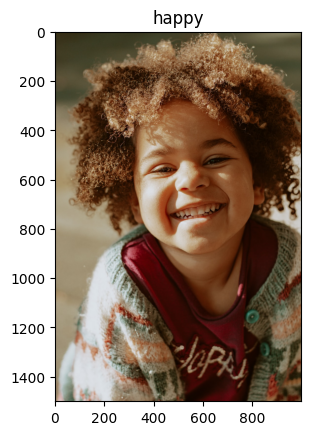

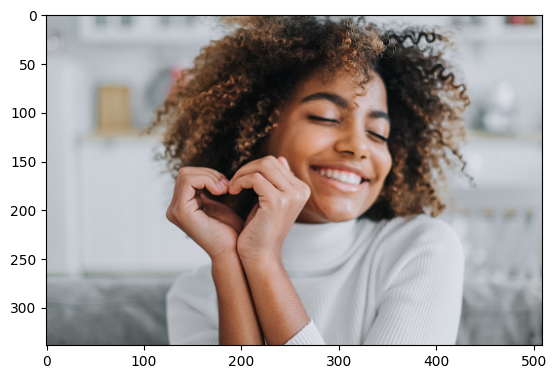

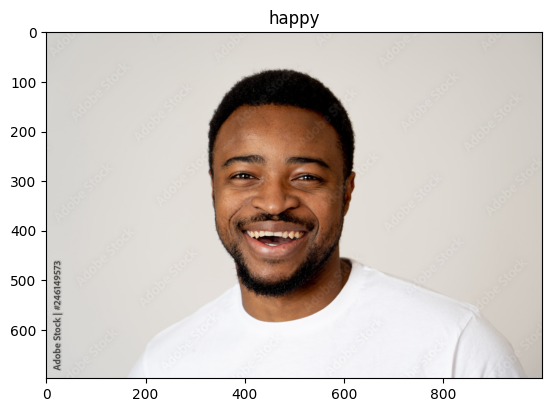

Invalid Image
Invalid Image


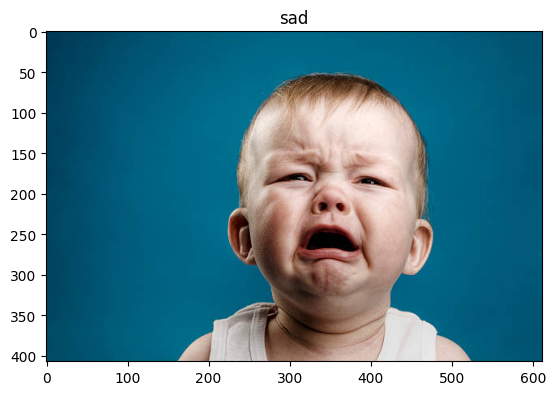

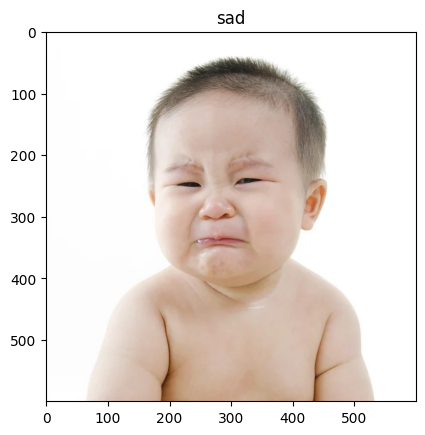

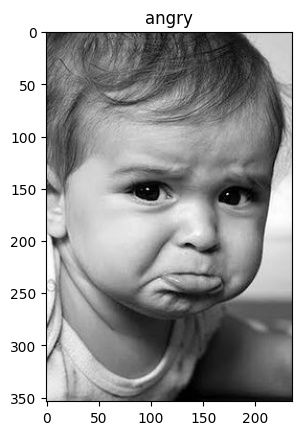

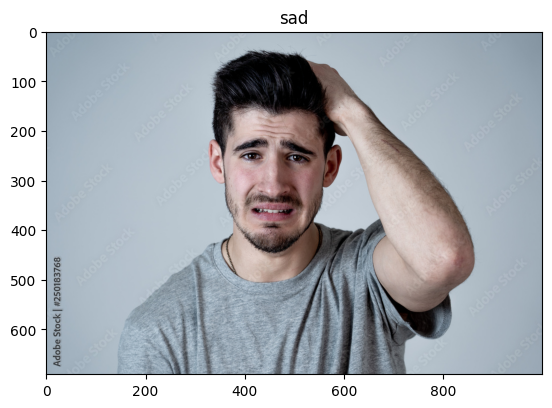

In [ ]:
# import the modules
import os
from os import listdir
import PIL
n_files = len(os.listdir(dir_path))
for i, img_name in enumerate(files[0:10]):
    if (img_name.endswith(".png") or img_name.endswith(".jpg") or img_name.endswith(".jpeg")):
        try:
            image_path=os.path.join(dir_path,img_name)
            # check if the image ends with png or jpg or jpeg
            test_image_one = cv2.imread(image_path)
            emotion_detector = FER(mtcnn=True)
            # Capture all the emotions on the image
            captured_emotions = emotion_detector.detect_emotions(test_image_one)
 
            emotion_name, score = emotion_detector.top_emotion(test_image_one )
#             print("dominant emotion:",emotion_name )
       
            plt.imshow(cv2.cvtColor(test_image_one, cv2.COLOR_BGR2RGB))
            plt.title(emotion_name)
            plt.show()
        except:
            print("Invalid Image")

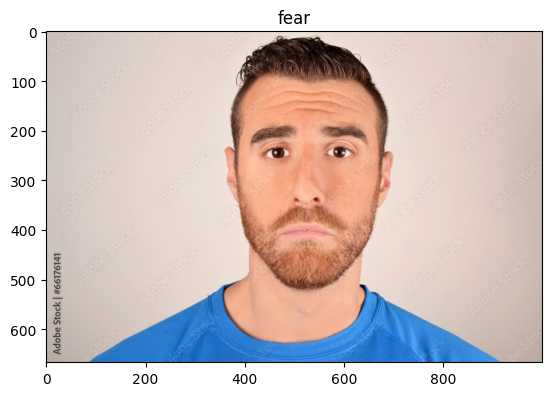

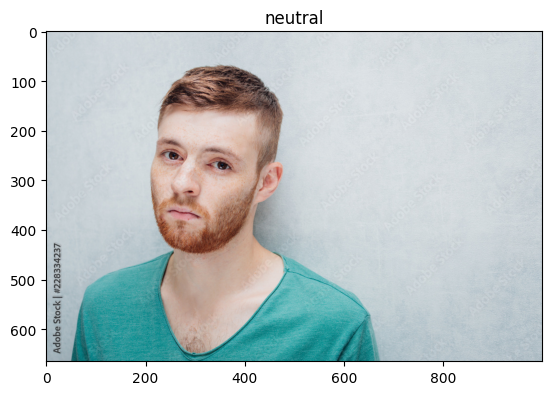

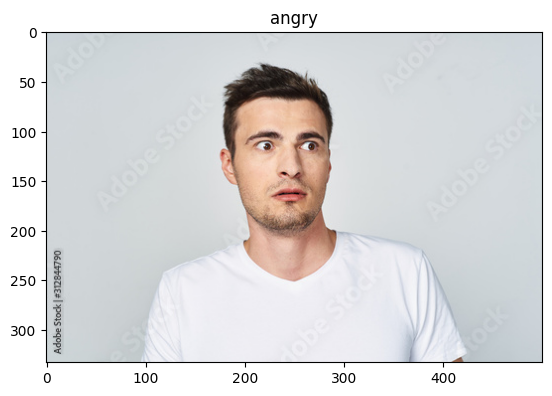

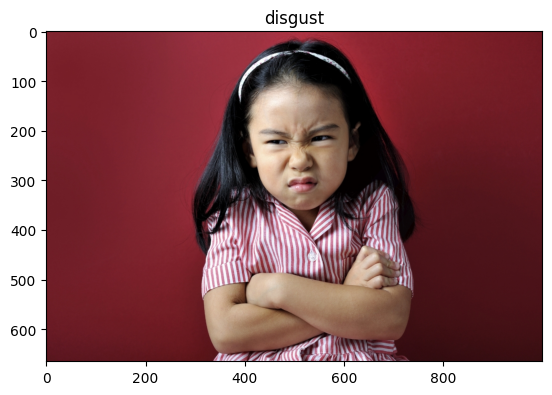

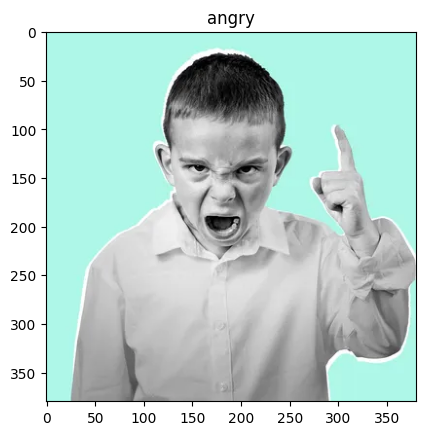

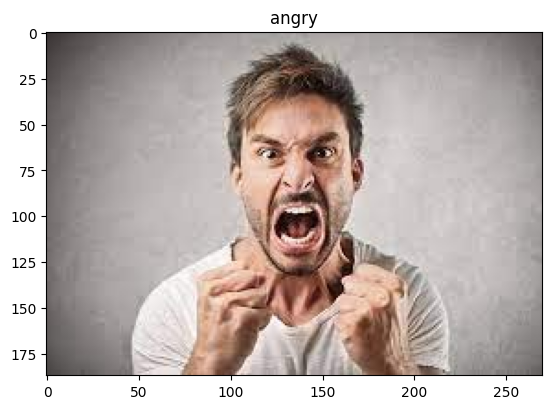

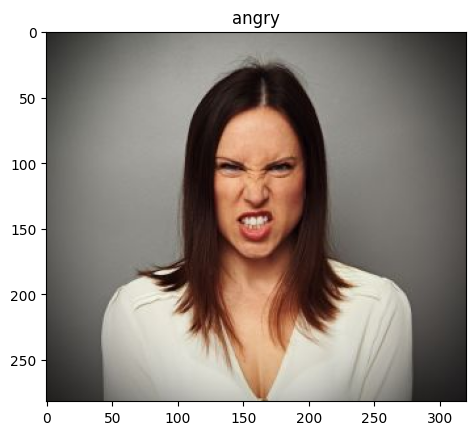

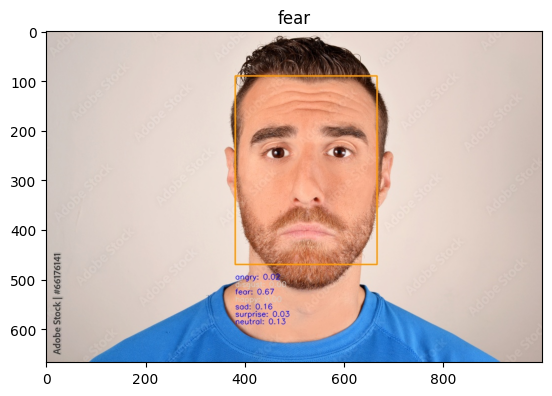

In [ ]:
# import the modules
import os
from os import listdir
import PIL
n_files = len(os.listdir(dir_path))
for i, img_name in enumerate(files[10:]):
    if (img_name.endswith(".png") or img_name.endswith(".jpg") or img_name.endswith(".jpeg")):
        try:
            image_path=os.path.join(dir_path,img_name)
            # check if the image ends with png or jpg or jpeg
            test_image_one = cv2.imread(image_path)
            emotion_detector = FER(mtcnn=True)
            # Capture all the emotions on the image
            captured_emotions = emotion_detector.detect_emotions(test_image_one)
 
            emotion_name, score = emotion_detector.top_emotion(test_image_one )
#             print("dominant emotion:",emotion_name )
       
            plt.imshow(cv2.cvtColor(test_image_one, cv2.COLOR_BGR2RGB))
            plt.title(emotion_name)
            plt.show()
        except:
            print("Invalid Image")